# 영화 리뷰 분류 문제
IMDB 데이터 세트를 이용하여 영화 리뷰를 이진분류 합니다.

In [38]:
import keras
keras.__version__

'2.2.4'

## IMDB 데이터 세트
* IMBD 데이터 세트는 50000개로 이루어진 영화 리뷰 데이터 세트입니다.
* 이 데이터 세트는 훈련 세트 25000개와 테스트 세트 25000개로 나뉘어져 있습니다.
* 절반은 긍정 리뷰, 절반은 부정 리뷰로 이루어져 있습니다.
* 가장 자주 등장하는 단어 10000개만을 불러 옵니다.


*새로운 버전의 numpy를 사용 할 때  allow_pickle 함수와 호환성 문제가 발생하여 이를 보정하는 코드를 추가 했습니다.* 

In [0]:
from keras.datasets import imdb
import numpy as np

np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
np.load = np_load_old

## 데이터 가공
* 모든 데이터를 One-Hot 인코딩을 통해 0과 1로 이루어진 벡터로 변환합니다.

In [0]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 신경망 모델 만들기
* 총 3개의 층을 가진 신경망을 구성합니다.
* 첫번째 레이어와 두번째 레이어는 relu 활성화 함수를 통하여 정의하고, 마지막 레이어는 softmax 레이어를 통하여 전체의 합이 1이 되도록 정의합니다.

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## 신경망 모델  그래프 정의하기
* 앞서 만든 모델을 컴파일 하여 Tensorflow 그래프를 생성합니다.
* 이진 Corss-Entropy 오차를 Adam Optimizer 로 최소화 하는 최적화로 정의합니다.

In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

W0729 11:58:59.681576 139676116010880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0729 11:58:59.726411 139676116010880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0729 11:58:59.734501 139676116010880 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## 검증 데이터 분리
* 테스트용 데이터 세트에서 처음 본 데이터에 대한 모델의 정확도를 측정하기 위해 훈련 데이터에서 10000개의 샘플을 떼어서 검증 데이터 세트를 만듭니다.

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## 훈련
* 전체 데이터를 512크기의 무작위 배치를 만들어 20번 훈련 시킵니다.

In [31]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 186us/step - loss: 0.5345 - acc: 0.7899 - val_loss: 0.4122 - val_acc: 0.8687
Epoch 2/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.3297 - acc: 0.8981 - val_loss: 0.3171 - val_acc: 0.8850
Epoch 3/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.2381 - acc: 0.9241 - val_loss: 0.2831 - val_acc: 0.8893
Epoch 4/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.1883 - acc: 0.9382 - val_loss: 0.2865 - val_acc: 0.8845
Epoch 5/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.1516 - acc: 0.9517 - val_loss: 0.2766 - val_acc: 0.8891
Epoch 6/20
15000/15000 [==============================] - 2s 166us/step - loss: 0.1268 - acc: 0.9612 - val_loss: 0.3134 - val_acc: 0.8790
Epoch 7/20
15000/15000 [==============================] - 3s 168us/step - loss: 0.1053 - acc: 0.9683 - val_loss: 0.3115 - 

## 훈련 및 검증 데이터 시각화
* MatplotLib 를 이용하여 훈련 상황을 시각화 합니다.

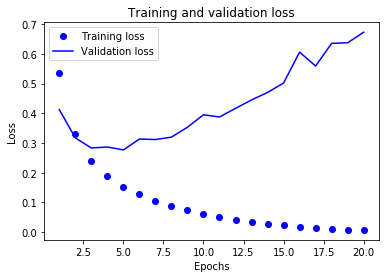

In [33]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

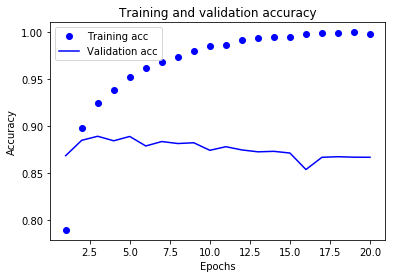

In [34]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 신경망 재구성
* 확인 결과 원하는대로 훈련이 진행 되었지만, 검증 데이터 세트에 대한 정확도는 3번째 epoch 이후 하락합니다.
* 이는 과적합을 뜻하므로, 4번째 epoch 까지만 훈련을 하는 방법을 사용해 볼 수 있습니다.


4번째 epoch까지만 훈련 하도록  다시 모델을 구성하여 훈련 합니다.

In [35]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 129us/step - loss: 0.5140 - acc: 0.7817
Epoch 2/4
25000/25000 [==============================] - 3s 113us/step - loss: 0.2595 - acc: 0.9066
Epoch 3/4
25000/25000 [==============================] - 3s 113us/step - loss: 0.1905 - acc: 0.9322
Epoch 4/4
25000/25000 [==============================] - 2s 82us/step


In [36]:
results

[0.3042983635234833, 0.8806]

놀랍게도 87% 의 정확도를 달성 하였습니다!

In [37]:
model.predict(x_test)

array([[0.20165762],
       [0.9998563 ],
       [0.7673379 ],
       ...,
       [0.09266764],
       [0.06872153],
       [0.6988252 ]], dtype=float32)

새로운 데이터에 대한 예측 결과, 0.69나 0.76등 경계적인 값이 발견 되었습니다. 이는 샘플에 대한 확신이 부족하다는 뜻으로, 모델을 튜닝하여 더 나은 결과를 얻을 수 있을 것으로 예상합니다.